In [122]:
import pandas as pd
data_df=pd.read_csv("news.csv")
data_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [123]:
data_df.drop("Unnamed: 0",axis=1,inplace=True)
data_df.head(10)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [17]:
data_df.count()

title    6335
text     6335
label    6335
dtype: int64

In [18]:
import seaborn as sns

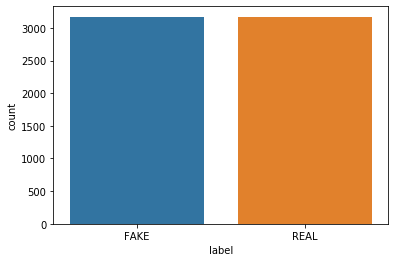

In [96]:
sns.countplot(x ='label', data = data_df) 

In [20]:
data_df.groupby('label').count()

,title,text
label,,
FAKE,3164,3164
REAL,3171,3171


In [114]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
import string
def pun(txt):
    punctuation_removed="".join([c for c in txt if c not in string.punctuation])
    return punctuation_removed

In [22]:
data_df['text']=data_df['text'].apply(lambda x: pun(x))

In [23]:
data_df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL


In [24]:
from nltk.tokenize import word_tokenize

In [25]:
data_df['text_tokenized']=data_df['text'].apply(lambda x: word_tokenize(x))

In [26]:
data_df.head()

,title,text,label,text_tokenized
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE,"[Daniel, Greenfield, a, Shillman, Journalism, ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[Google, Pinterest, Digg, Linkedin, Reddit, St..."
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL,"[US, Secretary, of, State, John, F, Kerry, sai..."
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE,"[—, Kaydee, King, KaydeeKing, November, 9, 201..."
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL,"[Its, primary, day, in, New, York, and, frontr..."


In [27]:
import nltk

In [28]:
sw=nltk.corpus.stopwords.words('english')
def remove_stopwords(txt):
    removed=[word for word in txt if word not in sw]
    return removed
data_df['after_removing_stopwords']=data_df['text_tokenized'].apply(lambda x: remove_stopwords(x))
data_df.head()

,title,text,label,text_tokenized,after_removing_stopwords
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE,"[Daniel, Greenfield, a, Shillman, Journalism, ...","[Daniel, Greenfield, Shillman, Journalism, Fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[Google, Pinterest, Digg, Linkedin, Reddit, St...","[Google, Pinterest, Digg, Linkedin, Reddit, St..."
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL,"[US, Secretary, of, State, John, F, Kerry, sai...","[US, Secretary, State, John, F, Kerry, said, M..."
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE,"[—, Kaydee, King, KaydeeKing, November, 9, 201...","[—, Kaydee, King, KaydeeKing, November, 9, 201..."
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL,"[Its, primary, day, in, New, York, and, frontr...","[Its, primary, day, New, York, frontrunners, H..."


In [29]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

def lemmatization(txt):
    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)
    lemmatizer = WordNetLemmatizer()
    lemmas=[]
    for word in txt:
        lemma = lemmatizer.lemmatize(word, get_wordnet_pos(word))                          
        lemmas.append(lemma)
                
    return lemmas


In [30]:
data_df['after_lemmatization']=data_df['after_removing_stopwords'].apply(lambda x: lemmatization(x))
data_df.head()

,title,text,label,text_tokenized,after_removing_stopwords,after_lemmatization
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE,"[Daniel, Greenfield, a, Shillman, Journalism, ...","[Daniel, Greenfield, Shillman, Journalism, Fel...","[Daniel, Greenfield, Shillman, Journalism, Fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[Google, Pinterest, Digg, Linkedin, Reddit, St...","[Google, Pinterest, Digg, Linkedin, Reddit, St...","[Google, Pinterest, Digg, Linkedin, Reddit, St..."
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL,"[US, Secretary, of, State, John, F, Kerry, sai...","[US, Secretary, State, John, F, Kerry, said, M...","[US, Secretary, State, John, F, Kerry, say, Mo..."
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE,"[—, Kaydee, King, KaydeeKing, November, 9, 201...","[—, Kaydee, King, KaydeeKing, November, 9, 201...","[—, Kaydee, King, KaydeeKing, November, 9, 201..."
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL,"[Its, primary, day, in, New, York, and, frontr...","[Its, primary, day, New, York, frontrunners, H...","[Its, primary, day, New, York, frontrunners, H..."


In [105]:
def clean(x):
    return [n for n in x if n!="'"or n!='"']
data_df['after_lemmatization']=data_df['after_lemmatization'].apply(lambda x: clean(x))

In [106]:
fake=data_df[data_df.label == 'FAKE']
fake['after_lemmatization'].head()

0    [Daniel, Greenfield, Shillman, Journalism, Fel...
1    [Google, Pinterest, Digg, Linkedin, Reddit, St...
3    [—, Kaydee, King, KaydeeKing, November, 9, 201...
5    [I, ’, immigrant, grandparent, More, 50, year,...
6    [Share, This, Baylee, Luciani, left, Screensho...
Name: after_lemmatization, dtype: object

In [117]:
text_fake = [' '.join(text) for text in fake['after_lemmatization']]
final_text_fake =' '.join(text_fake)
final_text_fake[:1000]

'Daniel Greenfield Shillman Journalism Fellow Freedom Center New York writer focus radical Islam In final stretch election Hillary Rodham Clinton go war FBI The word “ unprecedented ” thrown around often election ought retire But ’ still unprecedented nominee major political party go war FBI But ’ exactly Hillary people do Coma patient wake watch hour CNN hospital bed would assume FBI Director James Comey Hillary ’ opponent election The FBI attack everyone Obama CNN Hillary ’ people circulate letter attack Comey There currently medium hit piece lambast target Trump It ’ surprising Clintons ally start run attack ad FBI The FBI ’ leadership warn entire leftwing establishment form lynch mob continue go Hillary And FBI ’ credibility attack medium Democrats preemptively head result investigation Clinton Foundation Hillary Clinton The covert struggle FBI agent Obama ’ DOJ people go explosively public The New York Times compare Comey J Edgar Hoover Its bizarre headline “ James Comey Role Reca

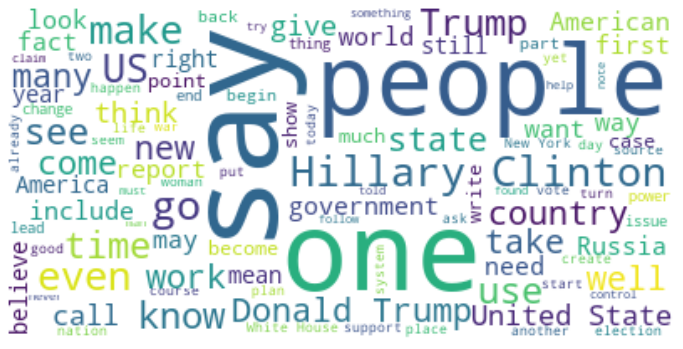

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud_fake = WordCloud(max_font_size=75, max_words=100,background_color="white").generate(final_text_fake)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

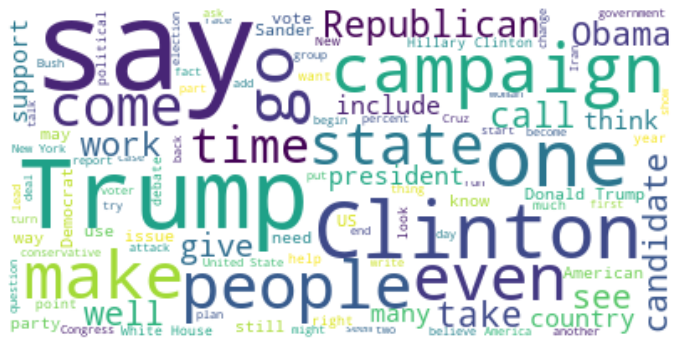

In [109]:
real=data_df[data_df.label == 'REAL']
text_real = [" ".join(text) for text in real['after_lemmatization']]
final_text_real = " ".join(text_real)
wordcloud_real = WordCloud(max_font_size=75, max_words=100,background_color="white").generate(final_text_real)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

In [110]:
flist=[]
for x in fake['after_lemmatization'] :
    flist.extend(x)

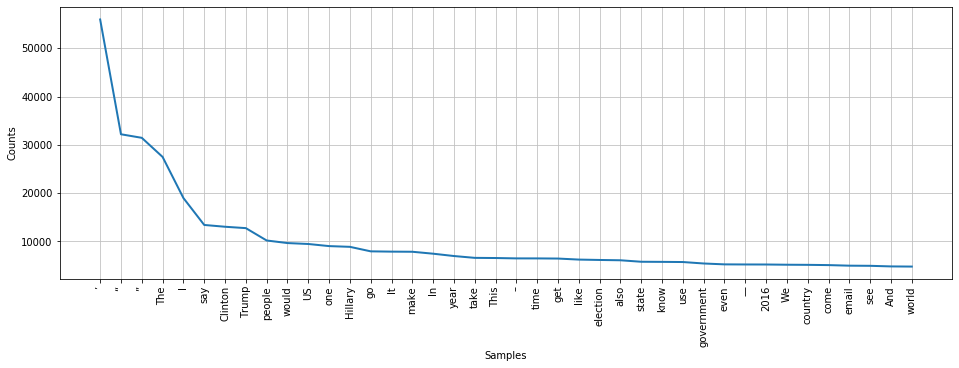

In [111]:
freqdist = nltk.FreqDist(flist)
plt.figure(figsize=(16,5))
freqdist.plot(40)

In [112]:
rlist=[]
for x in real['after_lemmatization'] :
    rlist.extend(x)

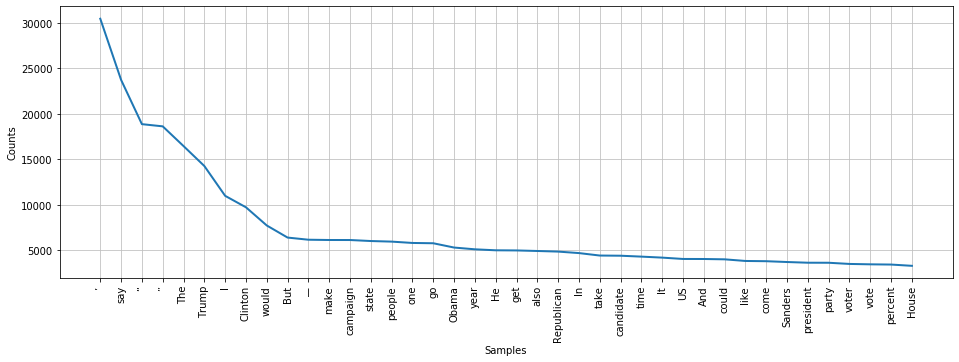

In [113]:
freqdist = nltk.FreqDist(rlist)
plt.figure(figsize=(16,5))
freqdist.plot(40)

In [ ]:
data_df['after_lemmatization']=data_df['after_lemmatization'].apply(lambda x: " ".join(x))
df=data_df[['title','after_lemmatization','label']].copy()
df.head()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tr_x,tx,tr_y,ty=train_test_split(df.after_lemmatization,df.label,test_size=0.3,random_state=42)
tfidf=TfidfVectorizer()
X_tfidf=tfidf.fit_transform(df.after_lemmatization)
X_train,X_test,y_train,y_test=train_test_split(X_tfidf,df.label,test_size=0.3,random_state=42)